In [14]:
import sys,os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib notebook

In [3]:
sys.path.append(os.getcwd())

# geneopt2

In [4]:
import testfuncs
import geneopt2
import goal

In [5]:
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def f(val):
    x=val[0]
    y=val[1]
    return my_func.do(x,y)

In [7]:
def show_my_func(cmap,elev=-30,azim=30):
    '''
    新しい関数を使用する際は以下のセルを実行しX,Y,Zを更新すること。
    Returns
    -------
    fig,ax,surf
    '''
    fig=plt.figure(facecolor='w')
    
    vmin=Z.min()
    vmax=Z.max()
    
    ax=fig.gca(projection='3d')
    ax.view_init(elev,azim)
    surf=ax.plot_surface(X,Y,Z,cmap=cmap,alpha=0.7,antialiased=True)
    ax.contour(X,Y,Z)
    ax.set_zlim(vmin,vmax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    #norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
    #colorbar=fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax)
    #colorbar.set_ticks(np.linspace(vmin,vmax,10))
    
    return fig,ax,surf

<IPython.core.display.Javascript object>


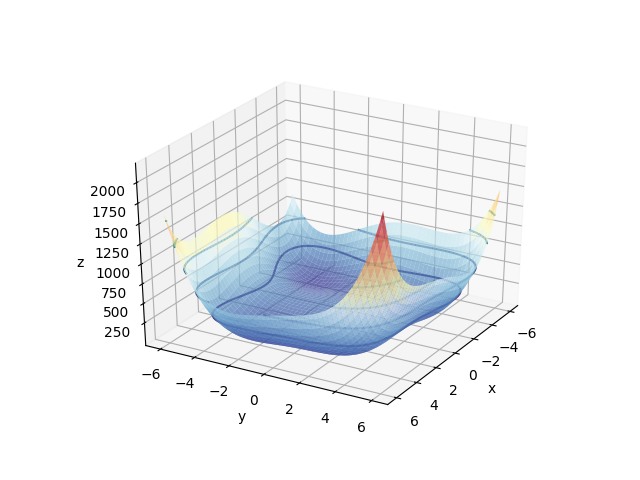

In [18]:
my_func=testfuncs.Himmelblau()
X=np.linspace(my_func.Xdomain()[0],my_func.Xdomain()[1],100)
Y=np.linspace(my_func.Ydomain()[0],my_func.Ydomain()[1],100)
X,Y=np.meshgrid(X,Y)
Z=my_func.do(X,Y)
Z=np.asarray(Z)

fig,ax,surf=show_my_func(cmap,elev,azim)

<IPython.core.display.Javascript object>


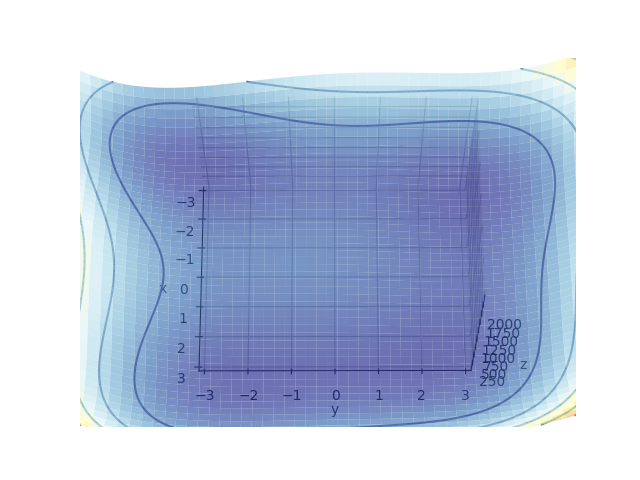

(-3, 3)

In [22]:
cmap=matplotlib.cm.RdYlBu_r
fig,ax,surf=show_my_func(cmap,elev,azim)
ax.set_xlim3d(-3,3)
ax.set_ylim3d(-3,3)

In [50]:
val_ranges=[
    (my_func.Xdomain()[0],my_func.Xdomain()[1])
    ,(my_func.Ydomain()[0],my_func.Ydomain()[1])
]
my_goal=goal.Minimize()
inherit_ways={
    geneopt2.Meaning(1):90
    ,geneopt2.SheerNew():10
}

In [51]:
N=100
num_parent=15
num_generation=10
opt=geneopt2.GeneticOptimizer(
    2 # M
    ,f
    ,val_ranges
    ,my_goal # goal
    ,N
    ,num_parent
    ,num_generation
    ,inherit_ways
)
#opt.enable_debug()

In [11]:
elev=30
azim=30

CPU times: user 32.5 ms, sys: 47 µs, total: 32.6 ms
Wall time: 47.4 ms


<IPython.core.display.Javascript object>


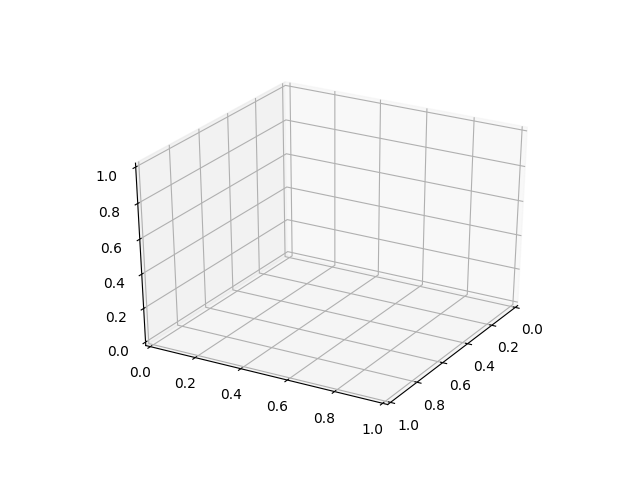

<IPython.core.display.Javascript object>


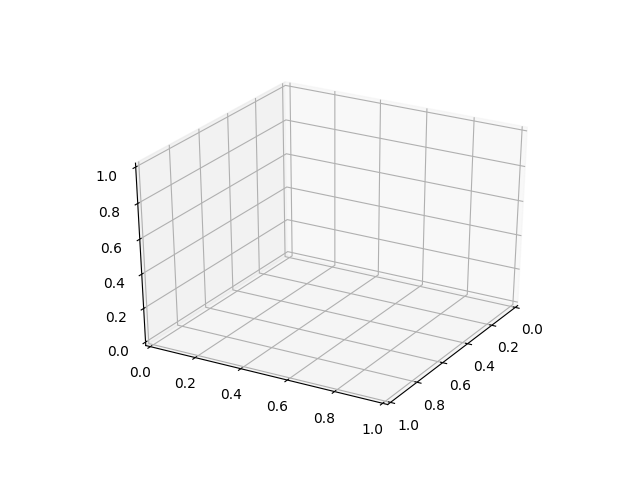

<IPython.core.display.Javascript object>


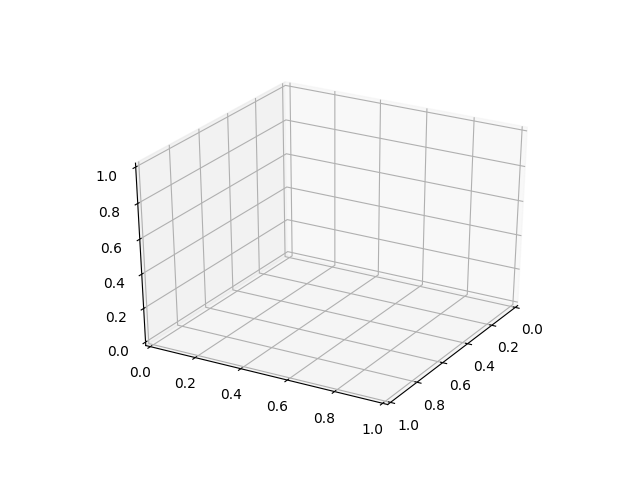

<IPython.core.display.Javascript object>


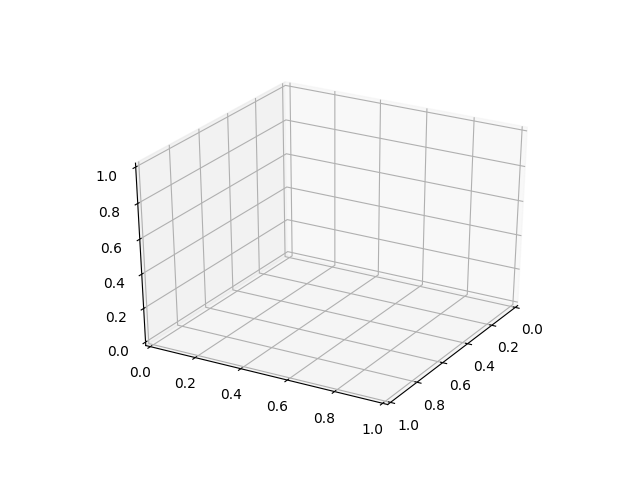

<IPython.core.display.Javascript object>


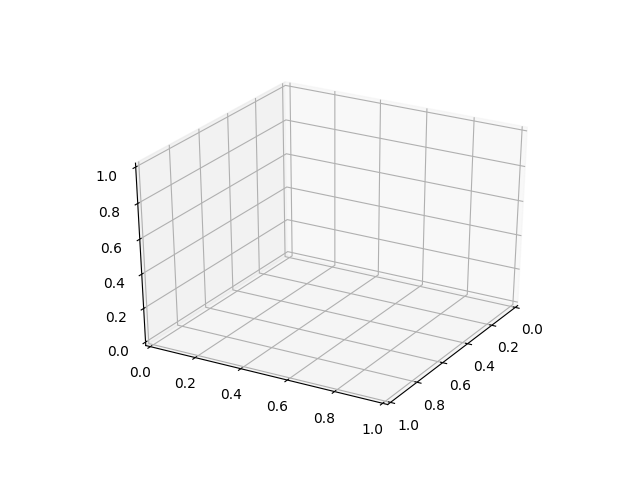

<IPython.core.display.Javascript object>


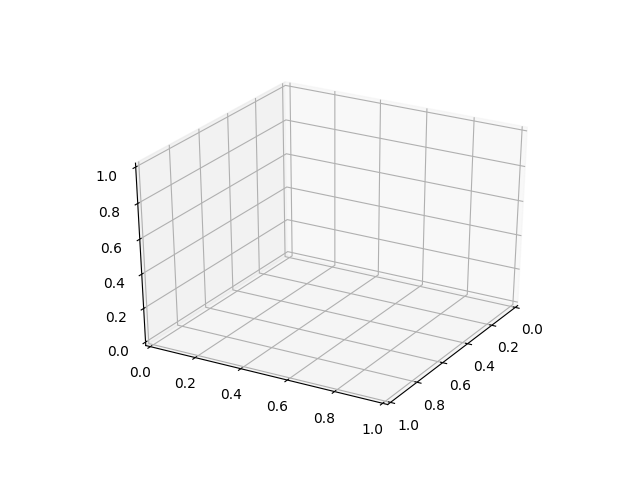

<IPython.core.display.Javascript object>


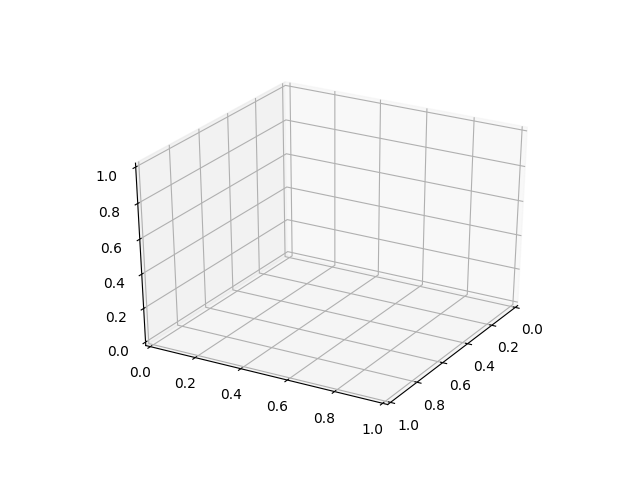

<IPython.core.display.Javascript object>


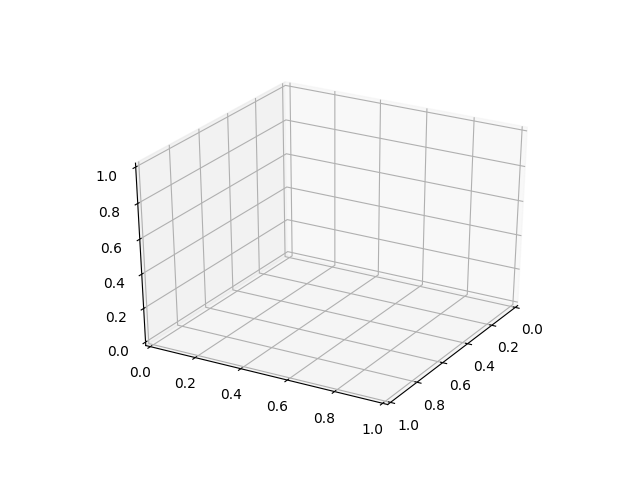

<IPython.core.display.Javascript object>


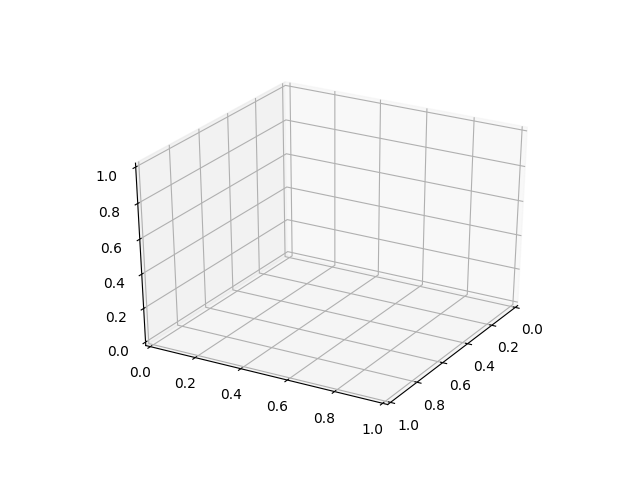

<IPython.core.display.Javascript object>


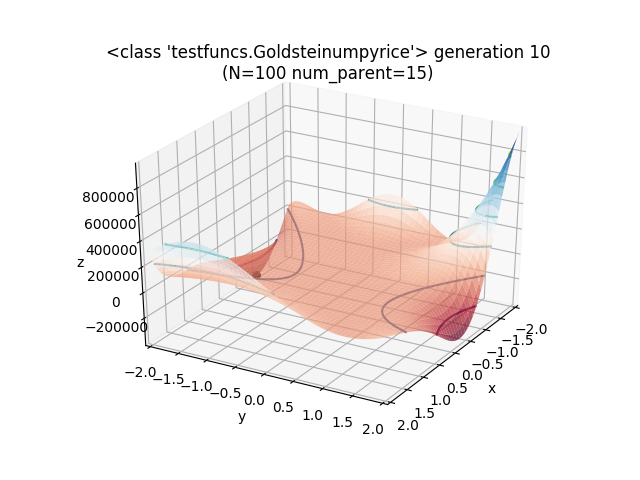

In [52]:
final_generation_variable_list=None
%time final_generation_variable_list,log=opt.execute()
save_results(cmap,elev,azim)

In [ ]:
save_results(cmap,elev,azim)

In [53]:
def save_results(cmap,elev,azim):
    for i,variable_list in enumerate(log,1):
        plt.cla()
    
        fig,ax,surf=show_my_func(cmap,elev,azim)
    
        data=np.transpose(variable_list)
        ax.scatter3D(data[0],data[1],my_func.do(data[0],data[1]),c='black')
    
        ax.set_xlim(my_func.Xdomain())
        ax.set_ylim(my_func.Ydomain())
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('{} generation {}\n(N={} num_parent={})'.format(my_func.__class__,i,N,num_parent))
        
        plt.savefig('./result/{}.png'.format(i))

In [54]:
print(my_func.Xmin(),my_func.Ymin())
final_generation_variable_list

[0] [-1]


[[-0.9828311806944369, -2.0],
 [-0.982831595766601, -2.0],
 [-0.9828301229843417, -2.0],
 [-0.9828319448552236, -2.0],
 [-0.9828320580204998, -2.0],
 [-0.9828297194318459, -2.0],
 [-0.982829532697071, -2.0],
 [-0.9828323443106295, -2.0],
 [-0.9828293886759633, -2.0],
 [-0.9828286366635768, -2.0],
 [-0.9828348530996676, -2.0],
 [-0.9828352774659614, -2.0],
 [-0.9828356401307621, -2.0],
 [-0.9828370593550385, -2.0],
 [-0.9828245427161093, -2.0]]

# geneopt1

In [ ]:
import goal
import geneopt1

In [ ]:
#標的関数の用意
def target_func(variable_list):
    x=variable_list[0]
    y=variable_list[1]
    return (x*x+y-11)**2+(x+y*y-7)**2

In [ ]:
import matplotlib.pyplot as plt
X=np.linspace(-6,6,100)
Y=np.linspace(-6,6,100)
Z=[]
for y in Y:
    Z.append([target_func([x,y])for x in X])
plt.pcolormesh(Z,vmin=0,vmax=700,cmap=plt.get_cmap('ocean'))

In [ ]:
#発現方法の定義
expression_x=geneopt1.Expression(-6,6,20)
expression_y=geneopt1.Expression(-6,6,20)
print(expression_x)

In [ ]:
#最適化目標の指定
my_goal=goal.Minimize()
print(my_goal)

In [ ]:
#遺伝方法の指定
inherit_ways={
    geneopt1.GeneticCrossing(0.05):1.0
    ,geneopt1.SheerMutation():0.01
}
inherit_ways

In [ ]:
my_geneopt1=geneopt1.GeneticOptimizer(
    2 #2つの変数を取る関数
    ,target_func #この関数に対して最適化する
    ,[expression_x,expression_y] #x,yをそれぞれ発現してもらう
    ,my_goal
    ,100 #1世代あたりの個体数
    ,20 #親にする個体数
    ,10 #10世代やる
    ,inherit_ways
)
my_geneopt1.enable_debug()
print(my_geneopt1)

In [ ]:
final_generation_variable_list=my_geneopt1.execute()
print(final_generation_variable_list)

In [ ]:
plt.pcolormesh(X,Y,Z,vmin=0,vmax=700,cmap=plt.get_cmap('ocean'))
for variable in final_generation_variable_list:
    plt.scatter(variable[0],variable[1],color='r',marker='.')

plt.show()